<h2>Create Custom Layers in Keras</h2>

<h2>Task 1: Introduction</h2>

<h2>Task 1: Importing Libraries</h2>

In [18]:
import tensorflow as tf
import utils
import matplotlib.pyplot as plt
%matplotlib inline

print('Tensorflow Version: ', tf.__version__)

Tensorflow Version:  2.3.0


<h2>Task 2: Import and Visualize Dataset</h2>

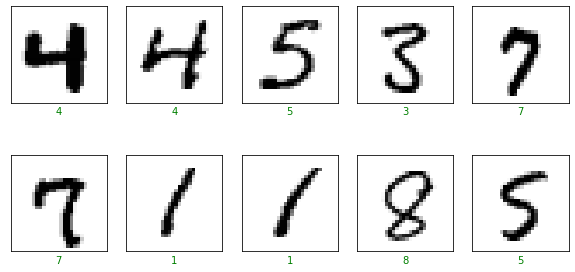

In [19]:
(x_train, y_train), (x_test, y_test) = utils.load_data()
utils.plot_random_examples(x_train, y_train).show()

<h2>Task 3: Create a Custom Layer</h2>

In [20]:
class ParametricRelu(tf.keras.layers.Layer):
  def __init__(self, **kwargs):
    super(ParametricRelu, self).__init__(**kwargs)

  def build(self, input_shape):
    self.alpha = self.add_weight(
        name = 'alpha',
        shape = (1,),
        initializer = 'zeros',
        trainable = True
    )
    super(ParametricRelu, self).build(input_shape)

  def call(self, x):
    return tf.maximum(0., x) + self.alpha * tf.maximum(0., x)  

In [ ]:
# can set intial value yourself by doing
'''class ParametricRelu(tf.keras.layers):
  def __init__(self, init_value, **kwargs):
    self.init_value = init_value
    super(ParametricRelu, self).__init__(**kwargs)

<h2>Task 4: Create the Model</h2>

In [21]:
def create_model(use_prelu = True):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(64, input_shape = (784,)))

  if use_prelu:
    model.add(ParametricRelu())
  else:
    model.add(tf.keras.layers.ReLU())

  model.add(tf.keras.layers.Dense(10, activation = 'softmax'))
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return model

model = create_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
parametric_relu_2 (Parametri (None, 64)                1         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 50,891
Trainable params: 50,891
Non-trainable params: 0
_________________________________________________________________


<h2>Task 5: Model Training</h2>

In [22]:
print('initial alpha: ', model.layers[1].get_weights())

h = model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs = 5
)

initial alpha:  [array([0.], dtype=float32)]
Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2939 - accuracy: 0.9167 - val_loss: 0.1576 - val_accuracy: 0.9521
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1354 - accuracy: 0.9603 - val_loss: 0.1225 - val_accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0960 - accuracy: 0.9711 - val_loss: 0.0991 - val_accuracy: 0.9689
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0757 - accuracy: 0.9761 - val_loss: 0.0911 - val_accuracy: 0.9720
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0601 - accuracy: 0.9815 - val_loss: 0.0946 - val_accuracy: 0.9708


In [23]:
print('Final alpha: ', model.layers[1].get_weights())

Final alpha:  [array([0.99772465], dtype=float32)]


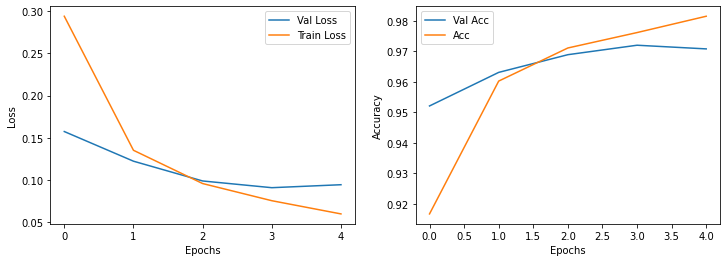

In [25]:
def plot_results(history):
    history = history.history
    plt.figure(figsize = (12, 4))
    epochs = len(history['val_loss'])
    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), history['val_loss'], label = 'Val Loss')
    plt.plot(range(epochs), history['loss'], label = 'Train Loss')
    plt.xticks(list(range(epochs)))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(range(epochs), history['val_accuracy'], label = 'Val Acc')
    plt.plot(range(epochs), history['accuracy'], label = 'Acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    return plt
    
plot_results(h).show()

In [26]:
utils.plot_results(h).show()

NameError: ignored

<h2>Task 6: Comparison with ReLU</h2> 

In [27]:
model = create_model(use_prelu=False)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                50240     
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [28]:
h = model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs = 5
)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3001 - accuracy: 0.9152 - val_loss: 0.1686 - val_accuracy: 0.9510
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1447 - accuracy: 0.9574 - val_loss: 0.1219 - val_accuracy: 0.9647
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1055 - accuracy: 0.9691 - val_loss: 0.1112 - val_accuracy: 0.9674
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0840 - accuracy: 0.9751 - val_loss: 0.0915 - val_accuracy: 0.9729
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0691 - accuracy: 0.9792 - val_loss: 0.0961 - val_accuracy: 0.9717


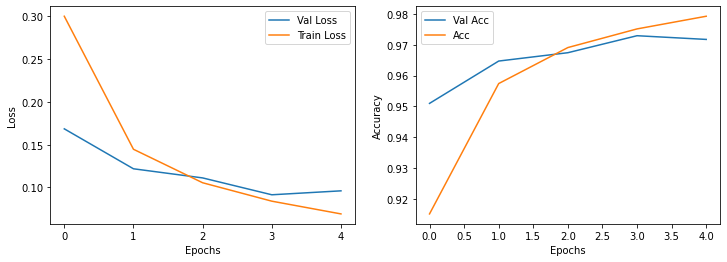

In [32]:
def plot_results(history):
    history = history.history
    plt.figure(figsize = (12, 4))
    epochs = len(history['val_loss'])
    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), history['val_loss'], label = 'Val Loss')
    plt.plot(range(epochs), history['loss'], label = 'Train Loss')
    plt.xticks(list(range(epochs)))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(range(epochs), history['val_accuracy'], label = 'Val Acc')
    plt.plot(range(epochs), history['accuracy'], label = 'Acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    return plt
    
plot_results(h).show()